In [1]:
import openpyxl
import scipy as scipy
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## считываются заданные переменные из excel
wb = openpyxl.load_workbook('test.xlsx') #открываем excel файл
sheet=wb.active #ссылается в файле на активную страницу
k = sheet['B1'].value #проницаемость
mu = sheet['B2'].value #вязкость
ct = sheet['B3'].value #сжимаемость
rw = sheet['B4'].value #радиус скважины
b = sheet['B6'].value #объемный коэф.
pi0 = sheet['B7'].value #начальное давление
m = sheet['B8'].value #пористость
h = sheet['B10'].value #толщина
s = sheet['B11'].value #cкин фактор
r = sheet['B13'].value #расстояние
cs=sheet['B18'].value  #влияние ствола скважины

In [3]:
# Создается массив из длительностей режима и суммируются все дни
srok=[0]*100 # массив для длительности режимов
all_days_of_work=0
i_for_days=2
days=sheet.cell(row=i_for_days, column=5).value 
while  str(days)!='None': # цикл, в котором считывается длительность режима
 srok[i_for_days-2]=float(days)
 print(srok[i_for_days-2])
 all_days_of_work=all_days_of_work+days
 i_for_days=i_for_days+1
 days=sheet.cell(row=i_for_days, column=5).value 
#суммируем все дни:
all_days_of_work

2.0
2.0
4.0
1.0
5.0


14

In [4]:
i_for_q=2
points_for_q=[0]*101 # массив для дебитов
points_for_q[0]=sheet.cell(row=i_for_q, column=4).value 
while  str(points_for_q[i_for_q-2])!='None': # цикл, в которм считываются значения дебитов
 print(points_for_q[i_for_q-2])
 i_for_q=i_for_q+1 
 points_for_q[i_for_q-2]=sheet.cell(row=i_for_q, column=4).value 
i_for_q=i_for_q-2


15
20
10
5
18


In [5]:
# Задается функция "изменение забойного давления"
def pwf(k,q,b,t,mu,m,ct,rw,pi): 
 rd=0.1/rw   
 td=0.00036*k*t
 td = td /mu/m/ct/(rw**2)+0.01
 E_1=scipy.special.expi(-rd**2/4/td)
 pd=-0.5*E_1
 dp=18.41*b*mu*pd/k/h*q
 return pi-dp   

In [6]:
# вводится массив srok1, чтобы в дальнейшем определить время , с которого скважина начинает работать с конкретным режимом
i=0
srok1=np.array(srok) 
while i<i_for_q-1:
    srok1[i+1]=srok1[i]+srok1[i+1]
    i=i+1

Введите шаг 0.1
начальный момент времени
0
дебит
15
забойное давление
250
конечный момент времени
2.0


начальный момент времени
2.0
дебит
20
забойное давление
238.91550853557047
конечный момент времени
2.0


начальный момент времени
4.0
дебит
10
забойное давление
224.13618658299774
конечный момент времени
4.0


начальный момент времени
8.0
дебит
5
забойное давление
216.36370066819012
конечный момент времени
1.0


начальный момент времени
9.0
дебит
18
забойное давление
212.86028252465667
конечный момент времени
5.0




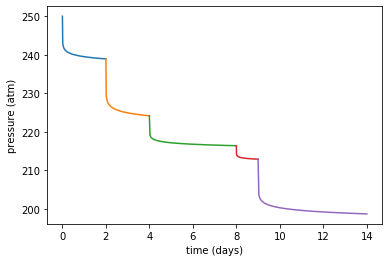

In [7]:

dx =float(input('Введите шаг ')) 
a=int(all_days_of_work//dx) # разбиваем суммарный временной промежуток заданным шагом
Y=[0]*(a)
Y=np.array(Y)
i=0
d0=0 #начальный момент времени
pi=pi0 #начальное забойное давление
fig, ax = plt.subplots()
ax.set_xlabel('time (days)')
ax.set_ylabel('pressure (atm)')
while i<i_for_q:
 x=np.linspace(0,srok[i],num=a) # создаем и возвращаем массив для оси X
 print('начальный момент времени')
 print(d0)
 print('дебит')
 print(points_for_q[i])
 print('забойное давление')
 print(pi)
 Y=pwf(k,points_for_q[i],b,x,mu,m,ct,rw,pi) #задаем ось Y для графика, вызывая функцию pwf
 pi=min(Y) #конечное забоеное давление для i-го режима
 x=np.linspace(d0,srok1[i],num=a) #задаем ось X для графика
 d0=srok1[i] #конечное время для i-го режима
 print('конечный момент времени')
 print(srok[i])
 i=i+1
 plt.plot(x,Y) #строим график
 print()
 print()

In [ ]:
import openpyxl

# создаем новый excel-файл
wb = openpyxl.Workbook()

# добавляем новый лист
wb.create_sheet(title = 'Первый лист', index = 0)

# получаем лист, с которым будем работать
sheet = wb['Первый лист']
a=10
cell=sheet.cell(row=5,column=8)
cell.value='huy'

wb.save('example.xlsx')